# Assignment 1 

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import urllib.request
from sklearn.metrics import accuracy_score
%matplotlib inline

# tune learning rate, activation function, hidden layers, optimazer, regulations 

## Read in dataset

In [2]:
# URL of the dataset
url = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes_scale"

# Download the data from the URL
with urllib.request.urlopen(url) as response:
    data = response.read().decode('utf-8')

# Convert the data into a list of lines
lines = data.split('\n')

# Initialize empty lists for data and labels
data_list = []
labels_list = []

# Parse the lines and extract data and labels
for line in lines:
    parts = line.strip().split(' ')
    if len(parts) > 1:
        labels_list.append(int(parts[0]))
        data_list.append([float(part.split(':')[1]) for part in parts[1:]])

# Create a Pandas DataFrame
columns = ['Pregnancies','Glucose','Bloodpressure','SkinThickness','Insulin','BMI','Diabetespedigree'
,'Age']
diabetes = pd.DataFrame(data_list, columns=columns)
diabetes['label'] = labels_list

# Display the first few rows of the DataFrame
print(diabetes.head())
diabetes.shape

   Pregnancies   Glucose  Bloodpressure  SkinThickness   Insulin       BMI  \
0    -0.294118  0.487437       0.180328      -0.292929 -1.000000  0.001490   
1    -0.882353 -0.145729       0.081967      -0.414141 -1.000000 -0.207153   
2    -0.058824  0.839196       0.049180      -1.000000 -1.000000 -0.305514   
3    -0.882353 -0.105528       0.081967      -0.535354 -0.777778 -0.162444   
4    -1.000000  0.376884      -0.344262      -0.292929 -0.602837  0.284650   

   Diabetespedigree       Age  label  
0         -0.531170 -0.033333     -1  
1         -0.766866 -0.666667      1  
2         -0.492741 -0.633333     -1  
3         -0.923997 -1.000000      1  
4          0.887276 -0.600000     -1  


(768, 9)

## Preprocessing dataset

In [3]:
diabetes.loc[diabetes['label'] == -1,'label'] = 0  
diabetes

,Pregnancies,Glucose,Bloodpressure,SkinThickness,Insulin,BMI,Diabetespedigree,Age,label
0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000,1
4,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
...,...,...,...,...,...,...,...,...,...
763,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000,1
764,-0.764706,0.226131,0.147541,-0.454545,-1.000000,0.096870,-0.776260,-0.800000,1
765,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000,1
766,-0.882353,0.266332,-0.016393,-1.000000,-1.000000,-0.102832,-0.768574,-0.133333,0


In [4]:
# checke the Nan 
diabetes.isnull().sum()

Pregnancies         0
Glucose             0
Bloodpressure       0
SkinThickness       0
Insulin             0
BMI                 0
Diabetespedigree    0
Age                 9
label               0
dtype: int64

In [5]:
# drop the nan
diabetes = diabetes.dropna()
diabetes.shape

(759, 9)

## Split the data 

In [25]:
print(diabetes.isna().sum().sum())
df = diabetes.dropna()

train_df, test_df = train_test_split(df, test_size=0.2, stratify = df['label'],random_state=123)
train_df["label"].value_counts(),test_df["label"].value_counts()



train_arry = train_df.to_numpy()
test_arry = test_df.to_numpy()
print(train_arry.shape,test_arry.shape)

train_features = train_arry[:,0:-1]
train_labels = train_arry[:,-1]
test_features = test_arry[:,0:-1]
test_labels = test_arry[:,-1]



train_features_tensor = torch.Tensor(train_features)
train_labels_tensor = torch.Tensor(train_labels).to(torch.float32).reshape(-1, 1) 

test_features_tensor = torch.Tensor(test_features)
test_labels_tensor = torch.Tensor(test_labels).to(torch.float32).reshape(-1, 1) 

# trainset = TensorDataset(train_features_tensor, train_labels_tensor)
# testset = TensorDataset(test_features_tensor, test_labels_tensor)

print(test_features_tensor)

0
(607, 9) (152, 9)
tensor([[-0.1765, -0.3769,  0.2787,  ..., -0.0283, -0.7327, -0.3333],
        [-1.0000,  0.0251,  0.2295,  ..., -1.0000, -0.5781, -1.0000],
        [-0.6471, -0.1256, -0.0164,  ..., -0.3502, -0.6874, -1.0000],
        ...,
        [ 0.0588,  0.2462,  0.1475,  ...,  0.0551, -0.8258, -0.5667],
        [-1.0000,  0.0553,  0.0492,  ...,  0.2370, -0.9189, -0.9667],
        [-0.8824, -0.0452,  0.0820,  ..., -0.4158, -0.7814, -0.8667]])


## Train the model 

In [26]:

X = train_features_tensor
y = train_labels_tensor


 
model = nn.Sequential(
  nn.Linear(8, 1),
  nn.Sigmoid() 
)
print(model)

# def init_weights(m):
#     if type(m) == nn.Linear:
#         nn.init.normal_(m.weight, std=0.01)

# model.apply(init_weights);

def mlp(n_epochs,batch_size,model,Xtrain,Ytrain,Xtest,Ytest,lr=0.05):
    loss_fn = nn.BCELoss() # binary cross-entropy
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    n_epochs = n_epochs
    batch_size = batch_size
    accuracy_lst = []
    accuracy_test_lst = []
    loss_lst = []
    for epoch in range(n_epochs):
        for i in range(0, len(Xtrain), batch_size):
            Xbatch = Xtrain[i:i+batch_size]
            y_pred = model(Xbatch)
            ybatch = Ytrain[i:i+batch_size]
            loss = loss_fn(y_pred, ybatch)
            optimizer.zero_grad() # clear the last gradient
            loss.backward() # nn.BCELoss() return a scale value for loss
                            # other loss function like mse may use loss.mean().backward() to caculate the mena of loss and then caculate gradient 
            optimizer.step()# update the W and b
        
        loss_lst.append(loss)
        y_pred = model(Xtrain)
        
        accuracy = (y_pred.round() == Ytrain).float().mean()
        accuracy_lst.append(accuracy)
    
        ytest_pred = model(Xtest)
        
        accuracy_test = (ytest_pred.round() == Ytest).float().mean()
        accuracy_test_lst.append(accuracy_test)
        
        param_lst = [batch_size, model, lr]
    
        print(f'Finished epoch {epoch}, latest loss {loss},accuracy {accuracy},accuracy_test {accuracy_test}')
    return loss_lst, accuracy_lst, accuracy_test_lst, param_lst

n_epochs =500
batch_size = 20
loss_lst, accuracy_lst, accuracy_test_lst, param_lst= mlp(n_epochs
                                                ,batch_size
                                                ,model 
                                                ,train_features_tensor
                                                ,train_labels_tensor
                                                ,test_features_tensor
                                                ,test_labels_tensor)



Sequential(
  (0): Linear(in_features=8, out_features=1, bias=True)
  (1): Sigmoid()
)
Finished epoch 0, latest loss 0.6007313132286072,accuracy 0.6540362238883972,accuracy_test 0.6513158082962036
Finished epoch 1, latest loss 0.5809692144393921,accuracy 0.6540362238883972,accuracy_test 0.6513158082962036
Finished epoch 2, latest loss 0.5664830803871155,accuracy 0.6540362238883972,accuracy_test 0.6513158082962036
Finished epoch 3, latest loss 0.554050087928772,accuracy 0.655683696269989,accuracy_test 0.6644737124443054
Finished epoch 4, latest loss 0.5429145693778992,accuracy 0.655683696269989,accuracy_test 0.6710526347160339
Finished epoch 5, latest loss 0.5328024625778198,accuracy 0.6606260538101196,accuracy_test 0.6907894611358643
Finished epoch 6, latest loss 0.5235691070556641,accuracy 0.6672158241271973,accuracy_test 0.6842105388641357
Finished epoch 7, latest loss 0.5151134133338928,accuracy 0.6771004796028137,accuracy_test 0.6907894611358643
Finished epoch 8, latest loss 0.5073

Finished epoch 77, latest loss 0.3882434368133545,accuracy 0.7693575024604797,accuracy_test 0.7894737124443054
Finished epoch 78, latest loss 0.3878161609172821,accuracy 0.7693575024604797,accuracy_test 0.7894737124443054
Finished epoch 79, latest loss 0.38739582896232605,accuracy 0.7710049152374268,accuracy_test 0.7894737124443054
Finished epoch 80, latest loss 0.3869822025299072,accuracy 0.7710049152374268,accuracy_test 0.7894737124443054
Finished epoch 81, latest loss 0.3865750730037689,accuracy 0.7710049152374268,accuracy_test 0.7960526347160339
Finished epoch 82, latest loss 0.3861742615699768,accuracy 0.7710049152374268,accuracy_test 0.7894737124443054
Finished epoch 83, latest loss 0.38577958941459656,accuracy 0.7710049152374268,accuracy_test 0.7894737124443054
Finished epoch 84, latest loss 0.3853908181190491,accuracy 0.7710049152374268,accuracy_test 0.7894737124443054
Finished epoch 85, latest loss 0.38500794768333435,accuracy 0.7726523876190186,accuracy_test 0.782894730567932

Finished epoch 161, latest loss 0.36650702357292175,accuracy 0.7710049152374268,accuracy_test 0.7828947305679321
Finished epoch 162, latest loss 0.36635610461235046,accuracy 0.7726523876190186,accuracy_test 0.7828947305679321
Finished epoch 163, latest loss 0.3662067949771881,accuracy 0.7726523876190186,accuracy_test 0.7828947305679321
Finished epoch 164, latest loss 0.3660591244697571,accuracy 0.7726523876190186,accuracy_test 0.7828947305679321
Finished epoch 165, latest loss 0.3659130930900574,accuracy 0.7710049152374268,accuracy_test 0.7828947305679321
Finished epoch 166, latest loss 0.3657686412334442,accuracy 0.7710049152374268,accuracy_test 0.7828947305679321
Finished epoch 167, latest loss 0.36562579870224,accuracy 0.7710049152374268,accuracy_test 0.7828947305679321
Finished epoch 168, latest loss 0.36548447608947754,accuracy 0.7726523876190186,accuracy_test 0.7828947305679321
Finished epoch 169, latest loss 0.3653446137905121,accuracy 0.7726523876190186,accuracy_test 0.78289473

Finished epoch 245, latest loss 0.35811465978622437,accuracy 0.7759472727775574,accuracy_test 0.7828947305679321
Finished epoch 246, latest loss 0.3580527901649475,accuracy 0.7759472727775574,accuracy_test 0.7828947305679321
Finished epoch 247, latest loss 0.35799163579940796,accuracy 0.7759472727775574,accuracy_test 0.7828947305679321
Finished epoch 248, latest loss 0.357930988073349,accuracy 0.7759472727775574,accuracy_test 0.7828947305679321
Finished epoch 249, latest loss 0.3578711152076721,accuracy 0.7759472727775574,accuracy_test 0.7828947305679321
Finished epoch 250, latest loss 0.3578117787837982,accuracy 0.7759472727775574,accuracy_test 0.7828947305679321
Finished epoch 251, latest loss 0.35775306820869446,accuracy 0.7759472727775574,accuracy_test 0.7828947305679321
Finished epoch 252, latest loss 0.3576948940753937,accuracy 0.7759472727775574,accuracy_test 0.7828947305679321
Finished epoch 253, latest loss 0.3576374053955078,accuracy 0.7759472727775574,accuracy_test 0.7828947

Finished epoch 330, latest loss 0.354573518037796,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 331, latest loss 0.3545471131801605,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 332, latest loss 0.3545210361480713,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 333, latest loss 0.3544951379299164,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 334, latest loss 0.35446953773498535,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 335, latest loss 0.3544441759586334,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 336, latest loss 0.3544189929962158,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 337, latest loss 0.3543941080570221,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 338, latest loss 0.35436946153640747,accuracy 0.7742998600006104,accuracy_test 0.78289473

Finished epoch 417, latest loss 0.3530091345310211,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 418, latest loss 0.3529976010322571,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 419, latest loss 0.3529861271381378,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 420, latest loss 0.3529747426509857,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 421, latest loss 0.35296350717544556,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 422, latest loss 0.35295242071151733,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 423, latest loss 0.3529413640499115,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 424, latest loss 0.35293036699295044,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 425, latest loss 0.3529195785522461,accuracy 0.7742998600006104,accuracy_test 0.782894

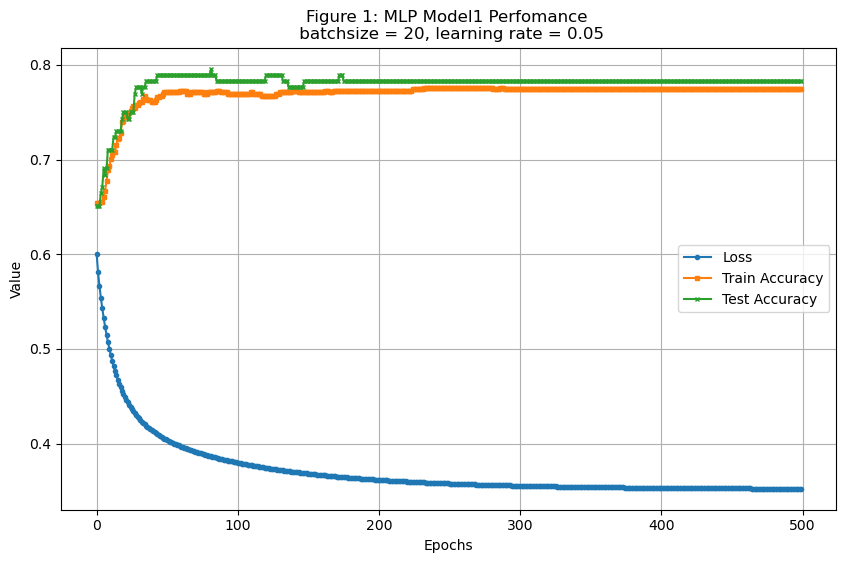

In [27]:
def learn_curve(n_epochs,loss_lst,accuracy_lst,accuracy_test_lst,param_lst, model_number = 1,title = f'Figure 1: MLP'):
    epochs = range(n_epochs)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, [loss.detach().numpy() for loss in loss_lst], label='Loss', marker='o', markersize=3)
    plt.plot(epochs, [accuracy.detach().numpy() for accuracy in accuracy_lst], label='Train Accuracy', marker='s', markersize=3)
    plt.plot(epochs, [accuracy_test.detach().numpy() for accuracy_test in accuracy_test_lst], label='Test Accuracy', marker='x', markersize=3)

    plt.title(f"{title} Model{model_number} Perfomance \n batchsize = {param_lst[0]}, learning rate = {param_lst[2]}")
    plt.xlabel('Epochs')
    plt.ylabel('Value')

    plt.legend()
    plt.grid(True)
    plt.show()

learn_curve(n_epochs,loss_lst,accuracy_lst,accuracy_test_lst,param_lst)

In [28]:
# tune the optimizer 
def mlp(n_epochs,batch_size,model,Xtrain,Ytrain,Xtest,Ytest,lr=0.05):
    loss_fn = nn.BCELoss() # binary cross-entropy
    optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
    # optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    n_epochs = n_epochs
    batch_size = batch_size
    accuracy_lst = []
    accuracy_test_lst = []
    loss_lst = []
    for epoch in range(n_epochs):
        for i in range(0, len(Xtrain), batch_size):
            Xbatch = Xtrain[i:i+batch_size]
            y_pred = model(Xbatch)
            ybatch = Ytrain[i:i+batch_size]
            loss = loss_fn(y_pred, ybatch)
            optimizer.zero_grad() # clear the last gradient
            loss.backward() # nn.BCELoss() return a scale value for loss
                            # other loss function like mse may use loss.mean().backward() to caculate the mena of loss and then caculate gradient 
            optimizer.step()# update the W and b
        
        loss_lst.append(loss)
        y_pred = model(Xtrain)
        
        accuracy = (y_pred.round() == Ytrain).float().mean()
        accuracy_lst.append(accuracy)
    
        ytest_pred = model(Xtest)
        
        accuracy_test = (ytest_pred.round() == Ytest).float().mean()
        accuracy_test_lst.append(accuracy_test)
        
        param_lst = [batch_size, model, lr]
    
        print(f'Finished epoch {epoch}, latest loss {loss},accuracy {accuracy},accuracy_test {accuracy_test}')
    return loss_lst, accuracy_lst, accuracy_test_lst, param_lst

n_epochs =500
batch_size = 20
loss_lst, accuracy_lst, accuracy_test_lst, param_lst= mlp(n_epochs
                                                ,batch_size
                                                ,model 
                                                ,train_features_tensor
                                                ,train_labels_tensor
                                                ,test_features_tensor
                                                ,test_labels_tensor)

Finished epoch 0, latest loss 0.35090988874435425,accuracy 0.7627677321434021,accuracy_test 0.7697368264198303
Finished epoch 1, latest loss 0.34648990631103516,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 2, latest loss 0.34548377990722656,accuracy 0.7644151449203491,accuracy_test 0.7763158082962036
Finished epoch 3, latest loss 0.3453438878059387,accuracy 0.7644151449203491,accuracy_test 0.7763158082962036
Finished epoch 4, latest loss 0.3453519642353058,accuracy 0.7644151449203491,accuracy_test 0.7763158082962036
Finished epoch 5, latest loss 0.3453812003135681,accuracy 0.7644151449203491,accuracy_test 0.7763158082962036
Finished epoch 6, latest loss 0.34541088342666626,accuracy 0.7644151449203491,accuracy_test 0.7763158082962036
Finished epoch 7, latest loss 0.34543848037719727,accuracy 0.7644151449203491,accuracy_test 0.7763158082962036
Finished epoch 8, latest loss 0.3454640209674835,accuracy 0.7644151449203491,accuracy_test 0.7763158082962036
Finis

Finished epoch 115, latest loss 0.3456360697746277,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 116, latest loss 0.3456360995769501,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 117, latest loss 0.34563615918159485,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 118, latest loss 0.34563618898391724,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 119, latest loss 0.3456362187862396,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 120, latest loss 0.3456362187862396,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 121, latest loss 0.3456363379955292,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 122, latest loss 0.34563636779785156,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 123, latest loss 0.34563639760017395,accuracy 0.7627677321434021,accuracy_test 0.77631

Finished epoch 231, latest loss 0.34563761949539185,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 232, latest loss 0.34563758969306946,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 233, latest loss 0.34563755989074707,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 234, latest loss 0.34563758969306946,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 235, latest loss 0.34563758969306946,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 236, latest loss 0.34563758969306946,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 237, latest loss 0.34563758969306946,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 238, latest loss 0.34563755989074707,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 239, latest loss 0.34563758969306946,accuracy 0.7627677321434021,accuracy_test 0.

Finished epoch 343, latest loss 0.345637708902359,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 344, latest loss 0.345637708902359,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 345, latest loss 0.345637708902359,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 346, latest loss 0.34563764929771423,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 347, latest loss 0.34563764929771423,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 348, latest loss 0.34563764929771423,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 349, latest loss 0.34563764929771423,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 350, latest loss 0.34563764929771423,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 351, latest loss 0.34563764929771423,accuracy 0.7627677321434021,accuracy_test 0.776315

Finished epoch 452, latest loss 0.34563761949539185,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 453, latest loss 0.34563761949539185,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 454, latest loss 0.34563761949539185,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 455, latest loss 0.34563764929771423,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 456, latest loss 0.34563761949539185,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 457, latest loss 0.34563761949539185,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 458, latest loss 0.34563764929771423,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 459, latest loss 0.34563764929771423,accuracy 0.7627677321434021,accuracy_test 0.7763158082962036
Finished epoch 460, latest loss 0.34563764929771423,accuracy 0.7627677321434021,accuracy_test 0.

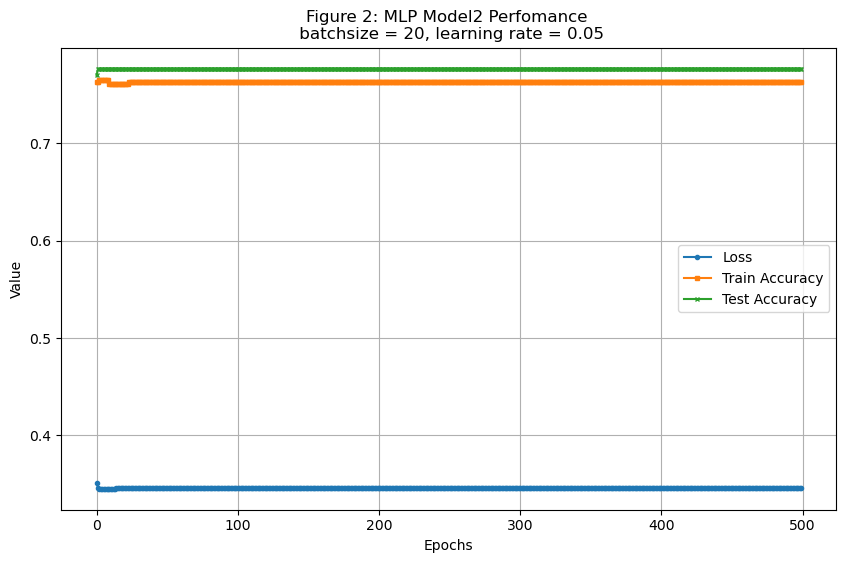

In [30]:
def learn_curve(n_epochs,loss_lst,accuracy_lst,accuracy_test_lst,param_lst, model_number = 2,title = f'Figure 2: MLP'):
    epochs = range(n_epochs)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, [loss.detach().numpy() for loss in loss_lst], label='Loss', marker='o', markersize=3)
    plt.plot(epochs, [accuracy.detach().numpy() for accuracy in accuracy_lst], label='Train Accuracy', marker='s', markersize=3)
    plt.plot(epochs, [accuracy_test.detach().numpy() for accuracy_test in accuracy_test_lst], label='Test Accuracy', marker='x', markersize=3)

    plt.title(f"{title} Model{model_number} Perfomance \n batchsize = {param_lst[0]}, learning rate = {param_lst[2]}")
    plt.xlabel('Epochs')
    plt.ylabel('Value')

    plt.legend()
    plt.grid(True)
    plt.show()

learn_curve(n_epochs,loss_lst,accuracy_lst,accuracy_test_lst,param_lst)

In [31]:
# tune the learning rate  0.1 
def mlp(n_epochs,batch_size,model,Xtrain,Ytrain,Xtest,Ytest,lr=0.1):
    loss_fn = nn.BCELoss() # binary cross-entropy
    #optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    n_epochs = n_epochs
    batch_size = batch_size
    accuracy_lst = []
    accuracy_test_lst = []
    loss_lst = []
    for epoch in range(n_epochs):
        for i in range(0, len(Xtrain), batch_size):
            Xbatch = Xtrain[i:i+batch_size]
            y_pred = model(Xbatch)
            ybatch = Ytrain[i:i+batch_size]
            loss = loss_fn(y_pred, ybatch)
            optimizer.zero_grad() # clear the last gradient
            loss.backward() # nn.BCELoss() return a scale value for loss
                            # other loss function like mse may use loss.mean().backward() to caculate the mena of loss and then caculate gradient 
            optimizer.step()# update the W and b
        
        loss_lst.append(loss)
        y_pred = model(Xtrain)
        
        accuracy = (y_pred.round() == Ytrain).float().mean()
        accuracy_lst.append(accuracy)
    
        ytest_pred = model(Xtest)
        
        accuracy_test = (ytest_pred.round() == Ytest).float().mean()
        accuracy_test_lst.append(accuracy_test)
        
        param_lst = [batch_size, model, lr]
    
        print(f'Finished epoch {epoch}, latest loss {loss},accuracy {accuracy},accuracy_test {accuracy_test}')
    return loss_lst, accuracy_lst, accuracy_test_lst, param_lst

n_epochs =500
batch_size = 20
loss_lst, accuracy_lst, accuracy_test_lst, param_lst= mlp(n_epochs
                                                ,batch_size
                                                ,model 
                                                ,train_features_tensor
                                                ,train_labels_tensor
                                                ,test_features_tensor
                                                ,test_labels_tensor)

Finished epoch 0, latest loss 0.3525535762310028,accuracy 0.7792421579360962,accuracy_test 0.7763158082962036
Finished epoch 1, latest loss 0.3545181453227997,accuracy 0.7792421579360962,accuracy_test 0.7763158082962036
Finished epoch 2, latest loss 0.35479047894477844,accuracy 0.7792421579360962,accuracy_test 0.7763158082962036
Finished epoch 3, latest loss 0.3546820282936096,accuracy 0.7792421579360962,accuracy_test 0.7763158082962036
Finished epoch 4, latest loss 0.35450801253318787,accuracy 0.7792421579360962,accuracy_test 0.7763158082962036
Finished epoch 5, latest loss 0.3543357253074646,accuracy 0.7792421579360962,accuracy_test 0.7763158082962036
Finished epoch 6, latest loss 0.35417813062667847,accuracy 0.7792421579360962,accuracy_test 0.7763158082962036
Finished epoch 7, latest loss 0.3540361523628235,accuracy 0.7792421579360962,accuracy_test 0.7763158082962036
Finished epoch 8, latest loss 0.35390886664390564,accuracy 0.7792421579360962,accuracy_test 0.7763158082962036
Finish

Finished epoch 83, latest loss 0.3522091209888458,accuracy 0.7775947451591492,accuracy_test 0.7763158082962036
Finished epoch 84, latest loss 0.3522011339664459,accuracy 0.7775947451591492,accuracy_test 0.7763158082962036
Finished epoch 85, latest loss 0.35219326615333557,accuracy 0.7775947451591492,accuracy_test 0.7763158082962036
Finished epoch 86, latest loss 0.3521853983402252,accuracy 0.7775947451591492,accuracy_test 0.7763158082962036
Finished epoch 87, latest loss 0.35217759013175964,accuracy 0.7775947451591492,accuracy_test 0.7763158082962036
Finished epoch 88, latest loss 0.3521699905395508,accuracy 0.7775947451591492,accuracy_test 0.7763158082962036
Finished epoch 89, latest loss 0.35216233134269714,accuracy 0.7775947451591492,accuracy_test 0.7763158082962036
Finished epoch 90, latest loss 0.35215479135513306,accuracy 0.7775947451591492,accuracy_test 0.7763158082962036
Finished epoch 91, latest loss 0.35214731097221375,accuracy 0.7775947451591492,accuracy_test 0.7763158082962

Finished epoch 170, latest loss 0.35175153613090515,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 171, latest loss 0.35174837708473206,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 172, latest loss 0.3517453372478485,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 173, latest loss 0.35174232721328735,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 174, latest loss 0.35173937678337097,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 175, latest loss 0.35173648595809937,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 176, latest loss 0.351733535528183,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 177, latest loss 0.35173067450523376,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 178, latest loss 0.3517279028892517,accuracy 0.7775947451591492,accuracy_test 0.7828

Finished epoch 253, latest loss 0.351590633392334,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 254, latest loss 0.3515895903110504,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 255, latest loss 0.35158848762512207,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 256, latest loss 0.3515874445438385,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 257, latest loss 0.35158634185791016,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 258, latest loss 0.35158535838127136,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 259, latest loss 0.3515842854976654,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 260, latest loss 0.351583331823349,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 261, latest loss 0.3515823185443878,accuracy 0.7775947451591492,accuracy_test 0.78289473

Finished epoch 335, latest loss 0.3515346348285675,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 336, latest loss 0.3515341877937317,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 337, latest loss 0.3515338897705078,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 338, latest loss 0.3515334725379944,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 339, latest loss 0.35153308510780334,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 340, latest loss 0.3515327274799347,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 341, latest loss 0.3515323996543884,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 342, latest loss 0.351531982421875,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 343, latest loss 0.35153165459632874,accuracy 0.7775947451591492,accuracy_test 0.78289473

Finished epoch 421, latest loss 0.3515148162841797,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 422, latest loss 0.35151466727256775,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 423, latest loss 0.351514607667923,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 424, latest loss 0.35151442885398865,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 425, latest loss 0.3515142798423767,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 426, latest loss 0.35151416063308716,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 427, latest loss 0.35151407122612,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 428, latest loss 0.35151392221450806,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 429, latest loss 0.3515138030052185,accuracy 0.7775947451591492,accuracy_test 0.78289473

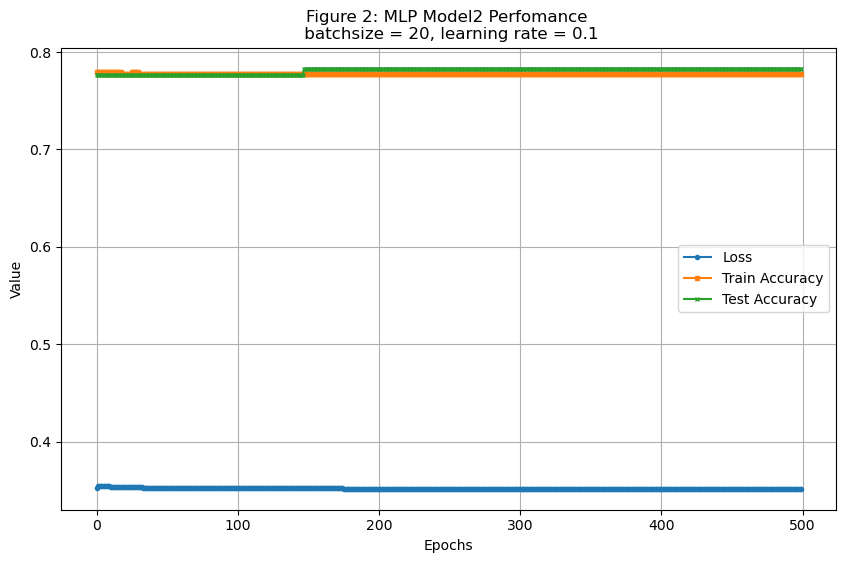

In [33]:
def learn_curve(n_epochs,loss_lst,accuracy_lst,accuracy_test_lst,param_lst, model_number = 2,title = f'Figure 2: MLP'):
    epochs = range(n_epochs)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, [loss.detach().numpy() for loss in loss_lst], label='Loss', marker='o', markersize=3)
    plt.plot(epochs, [accuracy.detach().numpy() for accuracy in accuracy_lst], label='Train Accuracy', marker='s', markersize=3)
    plt.plot(epochs, [accuracy_test.detach().numpy() for accuracy_test in accuracy_test_lst], label='Test Accuracy', marker='x', markersize=3)

    plt.title(f"{title} Model{model_number} Perfomance \n batchsize = {param_lst[0]}, learning rate = {param_lst[2]}")
    plt.xlabel('Epochs')
    plt.ylabel('Value')

    plt.legend()
    plt.grid(True)
    plt.show()

learn_curve(n_epochs,loss_lst,accuracy_lst,accuracy_test_lst,param_lst)

In [34]:
# tune the learning rate  0.01 
def mlp(n_epochs,batch_size,model,Xtrain,Ytrain,Xtest,Ytest,lr=0.001):
    loss_fn = nn.BCELoss() # binary cross-entropy
    # optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    n_epochs = n_epochs
    batch_size = batch_size
    accuracy_lst = []
    accuracy_test_lst = []
    loss_lst = []
    for epoch in range(n_epochs):
        for i in range(0, len(Xtrain), batch_size):
            Xbatch = Xtrain[i:i+batch_size]
            y_pred = model(Xbatch)
            ybatch = Ytrain[i:i+batch_size]
            loss = loss_fn(y_pred, ybatch)
            optimizer.zero_grad() # clear the last gradient
            loss.backward() # nn.BCELoss() return a scale value for loss
                            # other loss function like mse may use loss.mean().backward() to caculate the mena of loss and then caculate gradient 
            optimizer.step()# update the W and b
        
        loss_lst.append(loss)
        y_pred = model(Xtrain)
        
        accuracy = (y_pred.round() == Ytrain).float().mean()
        accuracy_lst.append(accuracy)
    
        ytest_pred = model(Xtest)
        
        accuracy_test = (ytest_pred.round() == Ytest).float().mean()
        accuracy_test_lst.append(accuracy_test)
        
        param_lst = [batch_size, model, lr]
    
        print(f'Finished epoch {epoch}, latest loss {loss},accuracy {accuracy},accuracy_test {accuracy_test}')
    return loss_lst, accuracy_lst, accuracy_test_lst, param_lst

n_epochs =500
batch_size = 20
loss_lst, accuracy_lst, accuracy_test_lst, param_lst= mlp(n_epochs
                                                ,batch_size
                                                ,model 
                                                ,train_features_tensor
                                                ,train_labels_tensor
                                                ,test_features_tensor
                                                ,test_labels_tensor)

Finished epoch 0, latest loss 0.3491080701351166,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 1, latest loss 0.34913375973701477,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 2, latest loss 0.3491590917110443,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 3, latest loss 0.34918412566185,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 4, latest loss 0.3492088317871094,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 5, latest loss 0.3492332100868225,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 6, latest loss 0.34925729036331177,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 7, latest loss 0.34928107261657715,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished epoch 8, latest loss 0.34930458664894104,accuracy 0.7775947451591492,accuracy_test 0.7828947305679321
Finished

Finished epoch 80, latest loss 0.35040947794914246,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 81, latest loss 0.35041895508766174,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 82, latest loss 0.3504283130168915,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 83, latest loss 0.35043758153915405,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 84, latest loss 0.3504466712474823,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 85, latest loss 0.35045570135116577,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 86, latest loss 0.35046467185020447,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 87, latest loss 0.3504734933376312,accuracy 0.7742998600006104,accuracy_test 0.7828947305679321
Finished epoch 88, latest loss 0.3504822552204132,accuracy 0.7742998600006104,accuracy_test 0.7828947305679

Finished epoch 167, latest loss 0.35093942284584045,accuracy 0.7742998600006104,accuracy_test 0.7894737124443054
Finished epoch 168, latest loss 0.3509431779384613,accuracy 0.7742998600006104,accuracy_test 0.7894737124443054
Finished epoch 169, latest loss 0.35094690322875977,accuracy 0.7742998600006104,accuracy_test 0.7894737124443054
Finished epoch 170, latest loss 0.3509506583213806,accuracy 0.7742998600006104,accuracy_test 0.7894737124443054
Finished epoch 171, latest loss 0.3509543240070343,accuracy 0.7742998600006104,accuracy_test 0.7894737124443054
Finished epoch 172, latest loss 0.35095807909965515,accuracy 0.7742998600006104,accuracy_test 0.7894737124443054
Finished epoch 173, latest loss 0.35096168518066406,accuracy 0.7742998600006104,accuracy_test 0.7894737124443054
Finished epoch 174, latest loss 0.350965291261673,accuracy 0.7742998600006104,accuracy_test 0.7894737124443054
Finished epoch 175, latest loss 0.3509688973426819,accuracy 0.7742998600006104,accuracy_test 0.789473

Finished epoch 254, latest loss 0.3511805236339569,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 255, latest loss 0.3511825501918793,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 256, latest loss 0.351184606552124,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 257, latest loss 0.3511866629123688,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 258, latest loss 0.35118868947029114,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 259, latest loss 0.3511907756328583,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 260, latest loss 0.35119274258613586,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 261, latest loss 0.3511947989463806,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 262, latest loss 0.351196825504303,accuracy 0.7742998600006104,accuracy_test 0.796052634

Finished epoch 340, latest loss 0.3513314127922058,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 341, latest loss 0.3513329327106476,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 342, latest loss 0.35133442282676697,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 343, latest loss 0.3513358533382416,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 344, latest loss 0.35133737325668335,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 345, latest loss 0.35133886337280273,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 346, latest loss 0.35134029388427734,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 347, latest loss 0.35134178400039673,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 348, latest loss 0.3513433337211609,accuracy 0.7742998600006104,accuracy_test 0.7960

Finished epoch 427, latest loss 0.35145068168640137,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 428, latest loss 0.35145193338394165,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 429, latest loss 0.35145315527915955,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 430, latest loss 0.3514544367790222,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 431, latest loss 0.3514556586742401,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 432, latest loss 0.3514569103717804,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 433, latest loss 0.3514581620693207,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 434, latest loss 0.3514593541622162,accuracy 0.7742998600006104,accuracy_test 0.7960526347160339
Finished epoch 435, latest loss 0.35146066546440125,accuracy 0.7742998600006104,accuracy_test 0.79605

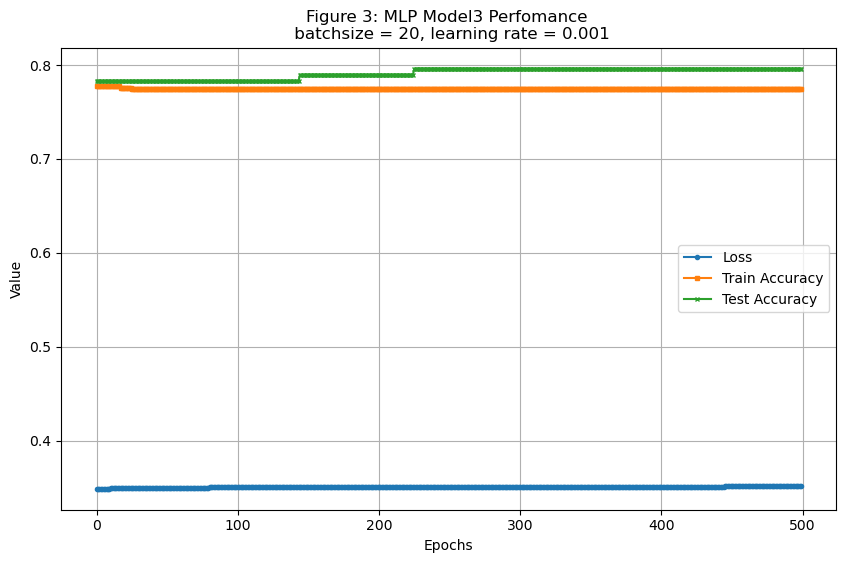

In [35]:
def learn_curve(n_epochs,loss_lst,accuracy_lst,accuracy_test_lst,param_lst, model_number = 3,title = f'Figure 3: MLP'):
    epochs = range(n_epochs)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, [loss.detach().numpy() for loss in loss_lst], label='Loss', marker='o', markersize=3)
    plt.plot(epochs, [accuracy.detach().numpy() for accuracy in accuracy_lst], label='Train Accuracy', marker='s', markersize=3)
    plt.plot(epochs, [accuracy_test.detach().numpy() for accuracy_test in accuracy_test_lst], label='Test Accuracy', marker='x', markersize=3)

    plt.title(f"{title} Model{model_number} Perfomance \n batchsize = {param_lst[0]}, learning rate = {param_lst[2]}")
    plt.xlabel('Epochs')
    plt.ylabel('Value')

    plt.legend()
    plt.grid(True)
    plt.show()

learn_curve(n_epochs,loss_lst,accuracy_lst,accuracy_test_lst,param_lst)